In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import tree
from xgboost import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dtrain = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
dtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dtrain.shape

(32561, 15)

In [0]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']

In [0]:
dtrain.columns = col_labels

In [6]:
dtrain.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [7]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
dtrain.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
dtrain.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
dtrain.duplicated().any()

True

In [11]:
dtrain.duplicated().sum()

24

In [0]:
dtrain.drop_duplicates(keep='first', inplace=True)

In [13]:
dtrain.shape

(32537, 15)

In [14]:
dtest = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows = 1,header = None)
dtest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [0]:
dtest.columns = col_labels

In [16]:
dtest.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [17]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [18]:
dtest.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [19]:
dtest.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [20]:
dtest.duplicated().any()

True

In [21]:
dtest.duplicated().sum()

5

In [0]:
dtest.drop_duplicates(keep='first', inplace=True)

In [23]:
dtest.shape

(16276, 15)

In [24]:
dtrain['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [25]:
dtrain['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [26]:
dtrain['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [27]:
dtrain['native_country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [28]:
dtrain_new = dtrain.replace(' ?', np.nan).dropna()
print(dtrain_new.shape)

(30139, 15)


In [29]:
dtest_new = dtest.replace(' ?', np.nan).dropna()
print(dtest_new.shape)

(15055, 15)


In [30]:
dtrain_new.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [31]:
dtest_new.wage_class.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [0]:
dtest_new['wage_class'] = dtest_new.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [33]:
dtest_new.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [0]:
combined_data = pd.concat([dtrain_new,dtest_new],axis=0)

In [35]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 0 to 16280
Data columns (total 15 columns):
age               45194 non-null int64
workclass         45194 non-null object
fnlwgt            45194 non-null int64
education         45194 non-null object
education_num     45194 non-null int64
marital_status    45194 non-null object
occupation        45194 non-null object
relationship      45194 non-null object
race              45194 non-null object
sex               45194 non-null object
capital_gain      45194 non-null int64
capital_loss      45194 non-null int64
hours_per_week    45194 non-null int64
native_country    45194 non-null object
wage_class        45194 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [36]:
pd.Categorical(combined_data['native_country'])

[United-States, United-States, United-States, United-States, Cuba, ..., United-States, United-States, United-States, United-States, United-States]
Length: 45194
Categories (41, object): [Cambodia, Canada, China, Columbia, ..., Trinadad&Tobago, United-States,
                          Vietnam, Yugoslavia]

In [37]:
combined_data.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [0]:
for i in combined_data.columns: 
    if combined_data[i].dtype == 'object': 
        combined_data[i] = pd.Categorical(combined_data[i]).codes

In [39]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 0 to 16280
Data columns (total 15 columns):
age               45194 non-null int64
workclass         45194 non-null int8
fnlwgt            45194 non-null int64
education         45194 non-null int8
education_num     45194 non-null int64
marital_status    45194 non-null int8
occupation        45194 non-null int8
relationship      45194 non-null int8
race              45194 non-null int8
sex               45194 non-null int8
capital_gain      45194 non-null int64
capital_loss      45194 non-null int64
hours_per_week    45194 non-null int64
native_country    45194 non-null int8
wage_class        45194 non-null int8
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


In [0]:
train_final = combined_data[:dtrain_new.shape[0]] 
test_final = combined_data[dtrain_new.shape[0]:]

In [0]:
train_x = train_final.pop('wage_class')
test_y = test_final.pop('wage_class')

In [42]:
train_final.shape

(30139, 14)

In [43]:
test_final.shape

(15055, 14)

In [44]:
train_x.shape

(30139,)

In [45]:
test_y.shape

(15055,)

In [46]:
#XGBoost using SKLearn
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
params = {'objective':'binary:logistic','max_depth': 2, 'learning_rate':1.0, 'silent':True,'n_estimators':500}

In [0]:
boost = XGBClassifier(**params).fit(train_final,train_x)

In [0]:
preds = boost.predict(test_final)

In [50]:
preds

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [51]:
acc = accuracy_score(test_y,preds)
acc

0.8628362670209233

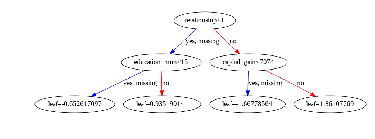

In [52]:
plot_tree(boost)

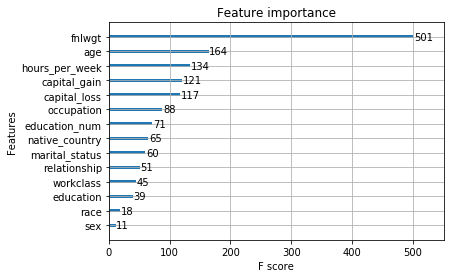

In [53]:
xgb.plot_importance(boost)